In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

**# VERİ İÇERİĞİ**

**AGE:**yaş

**SEX:**cinsiyet

**EXANG:**egzersiz sonrası göğüs ağrısı(1,0)

**CP:** gögüs ağrısı türü

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

**TRESTPBS:** dinlenme kan basıncı

**CHOL:** kolesterol değeri

**FBS:** aç iken kan şekeri

**RESTECG:** dinlenme sonucunda EKG sonucu

value 0 : normal

value 1 : ST-T dalga anormalliğine sahip olmak

value 2 : Estes kriterlerine göre olası veya kesin sol ventriküler hipertrofiyi gösteren(sol alt kalp odasının duvarlarının kalınlaşmasıdır)

**THALACHH:** maksimum kalp atış hızı

**FİNGER SHAPE:** parmak şekli

In [ ]:
df = pd.read_csv('/content/veri_setimiz.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
#tabloyu görüntüleme
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
# Veri Setinin istatistiksel değerleri görüntüleme
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.718543,0.708609
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.931947,1.940199,0.455157
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# verilerin tiplerini görüntülenmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [ ]:
#eksik değer kontrolü
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# katogorik özelliklerin analizi
categorical_List = ["sex","cp","fbs","restecg","exang","slope","ca","thal","output"]

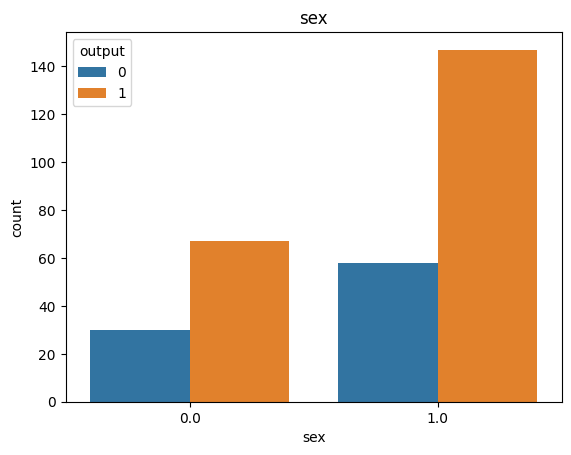

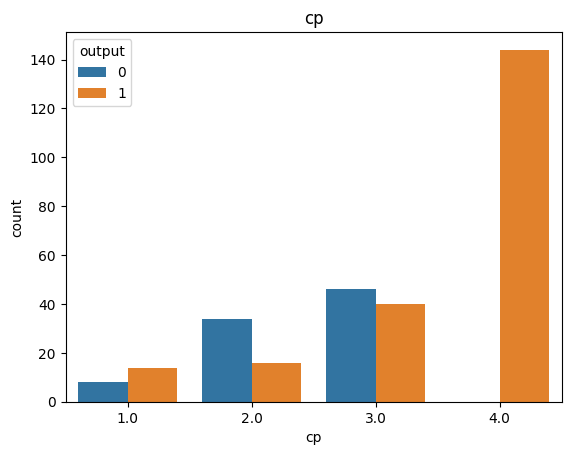

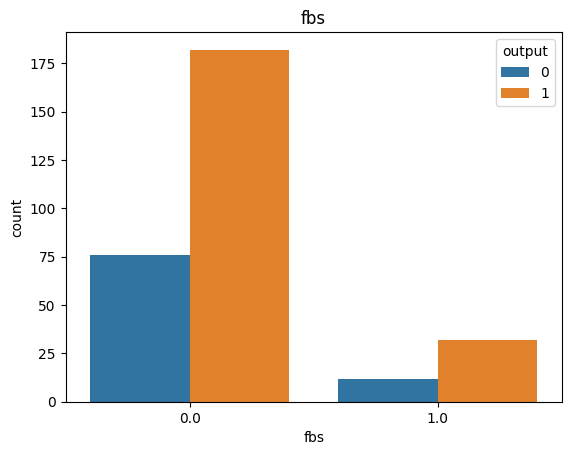

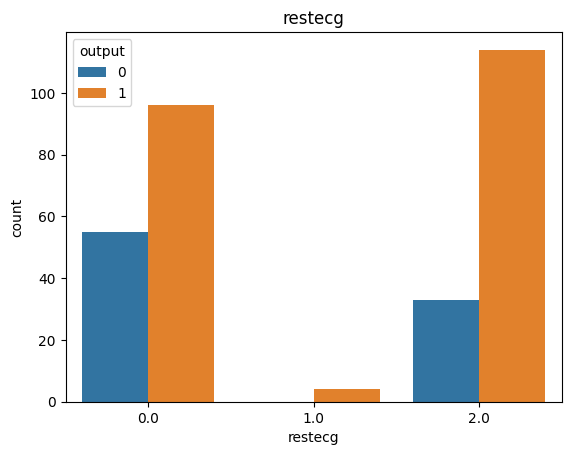

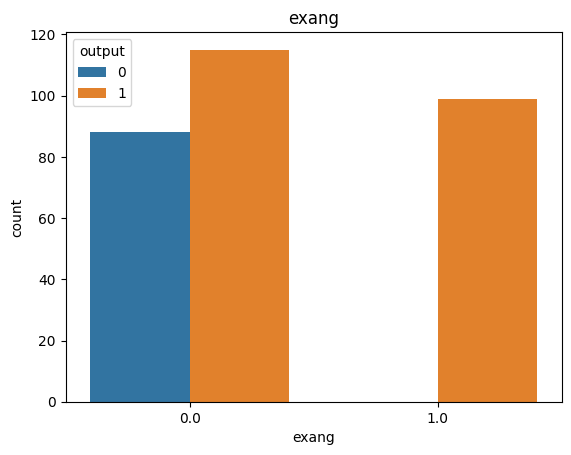

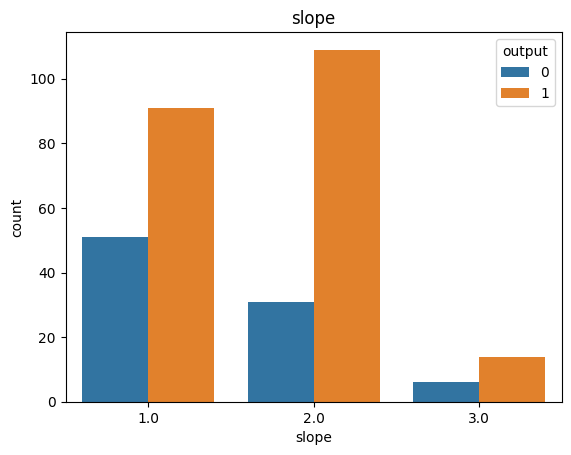

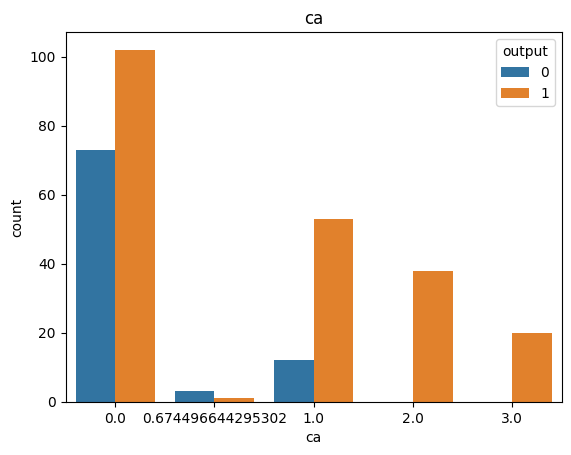

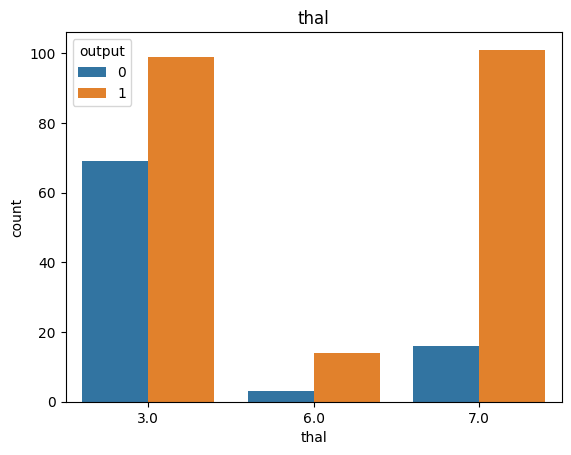

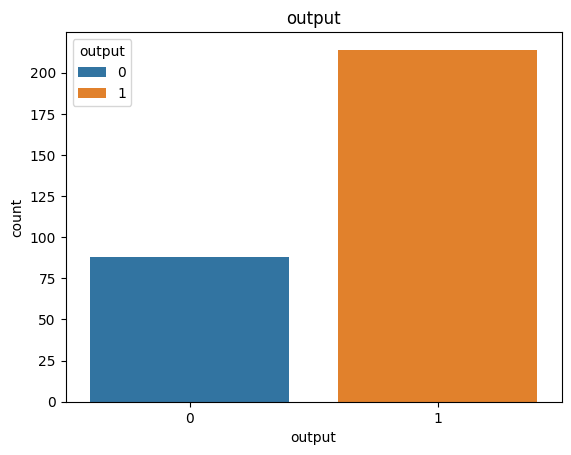

In [ ]:
df_categoric = df.loc[:,categorical_List]
for i in categorical_List:
  plt.figure()
  sns.countplot(x=i,data = df_categoric,hue="output")
  plt.title(i)

In [ ]:
numeric_List = ["age","trestbps","chol","thalach","oldpeak","output"]

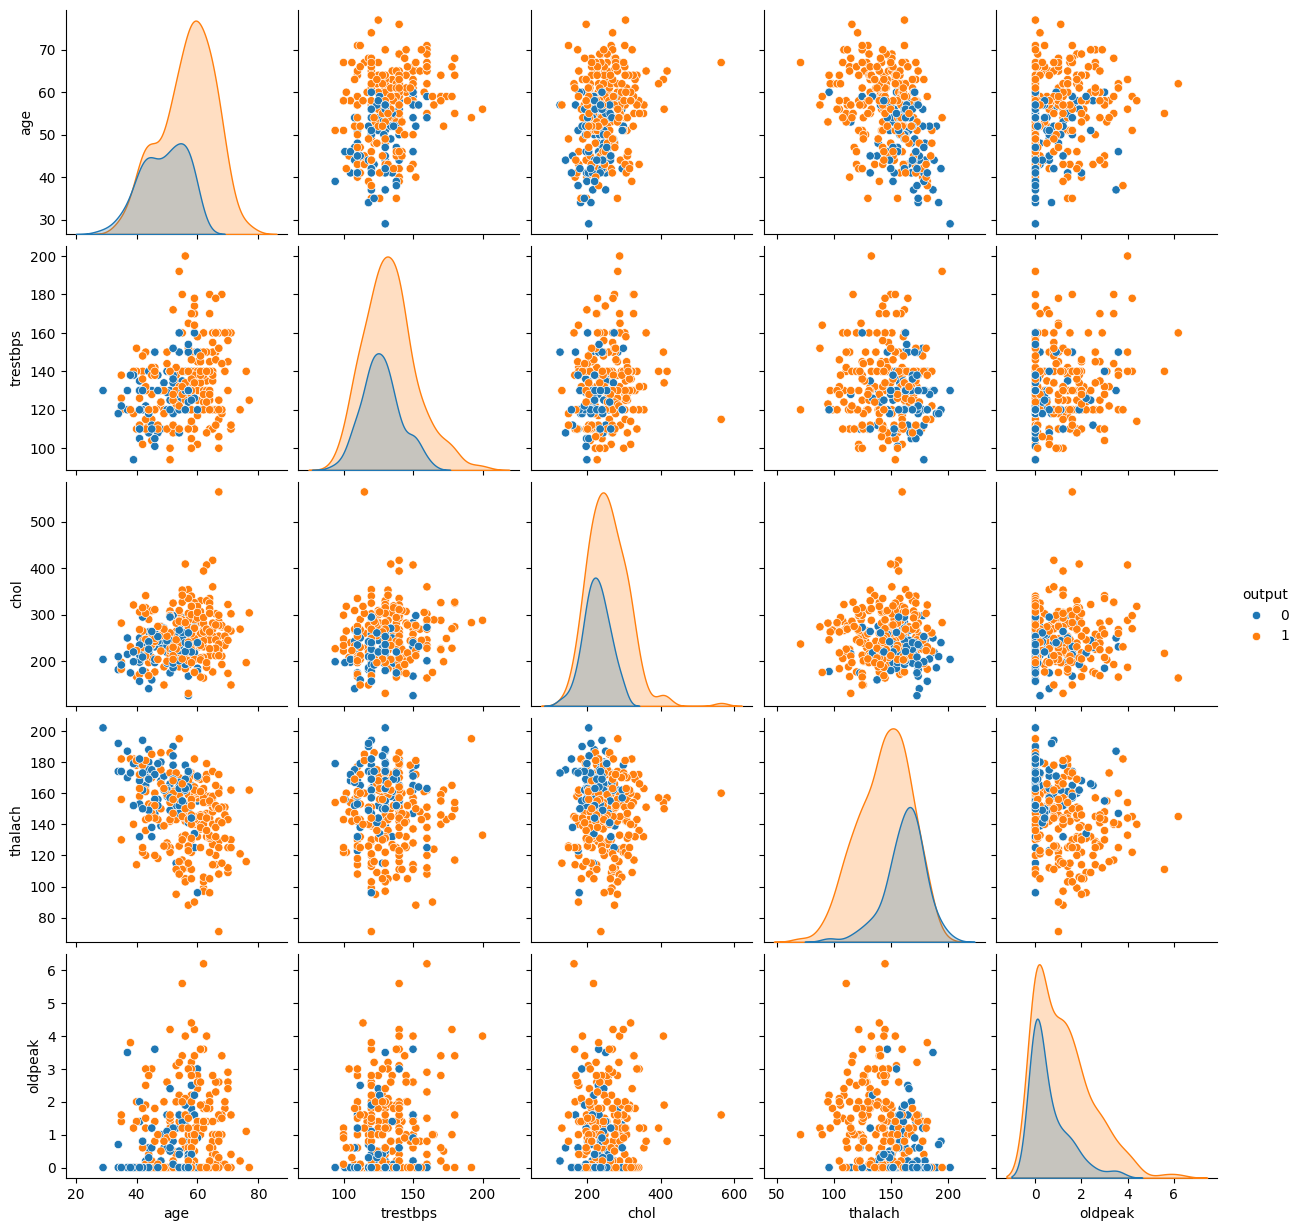

In [ ]:
#Sayısal Özelliklerin gösterilmesi
df_numeric = df.loc[:,numeric_List]
sns.pairplot(df_numeric,hue="output",diag_kind="kde")
plt.show()

In [ ]:
#Standardizasyon işlemleri
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
scaled_array = scaler.fit_transform(df[numeric_List[:-1]])

In [ ]:
scaled_array

array([[ 1.39491953,  1.61259594,  0.75837175, -1.81884042,  0.4009057 ],
       [ 1.39491953, -0.66232628, -0.34263283, -0.90080732,  1.35016352],
       [-1.92911281, -0.09359572,  0.06300044,  1.63471269,  2.12682901],
       ...,
       [ 0.28690875, -0.09359572, -2.23558807, -1.51282939,  0.1420172 ],
       [ 0.28690875, -0.09359572, -0.20742174,  1.06640648, -0.89353679],
       [-1.81831173,  0.36138872, -1.3856898 ,  1.02269062, -0.89353679]])

In [ ]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02
mean,-2.749824e-16,2.293971e-16,1.345502e-16,1.529314e-16,-7.058372e-17
std,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00
min,-2.815521e+00,-2.141026e+00,-2.332167e+00,-3.436327e+00,-8.935368e-01
25%,-7.103009e-01,-6.623263e-01,-6.903185e-01,-7.150149e-01,-8.935368e-01
50%,1.207071e-01,-9.359572e-02,-1.011845e-01,1.483734e-01,-2.031675e-01
75%,7.301131e-01,4.751348e-01,5.458972e-01,7.166796e-01,4.872019e-01
max,2.502930e+00,3.887518e+00,6.128184e+00,2.290451e+00,4.456825e+00


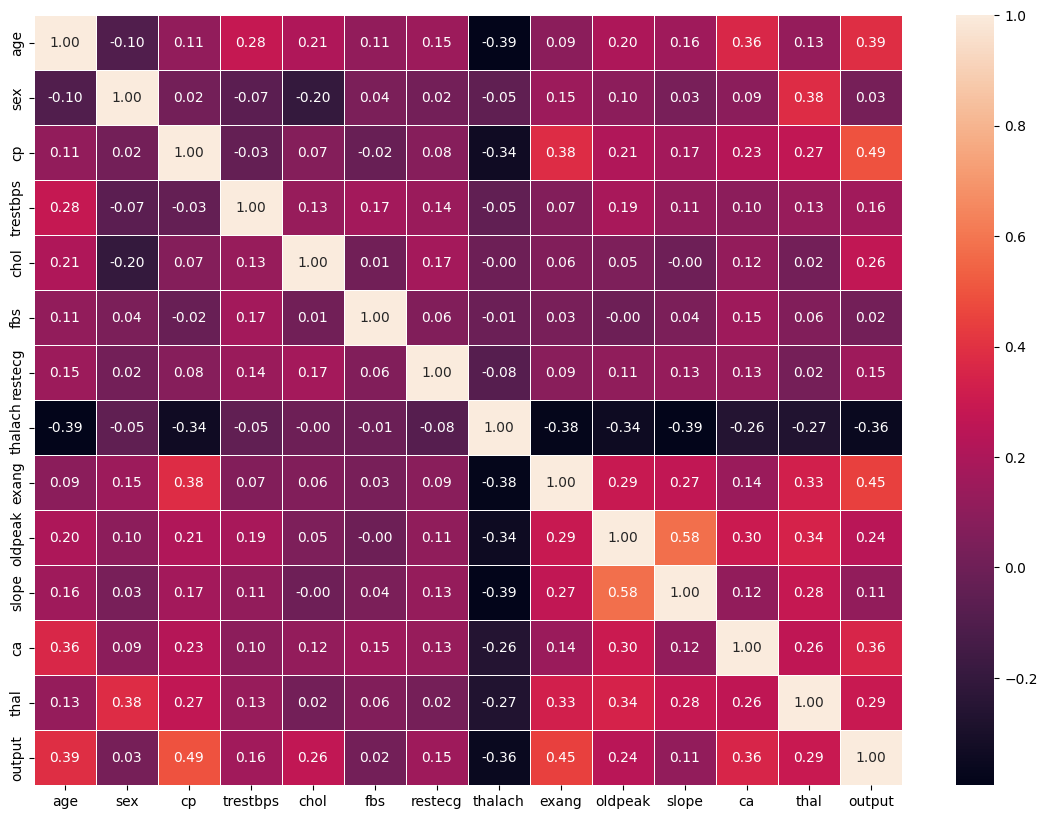

In [ ]:
#Korelasyon analizi

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.6)
plt.show()

In [ ]:
#Aykırı Değer Algılama
numeric_List = ["age","trestbps","chol","thalach","oldpeak"]
df_numeric = df.loc[:,numeric_List]
df_numeric.head()

,age,trestbps,chol,thalach,oldpeak
0,67.0,160.0,286.0,108.0,1.5
1,67.0,120.0,229.0,129.0,2.6
2,37.0,130.0,250.0,187.0,3.5
3,41.0,130.0,204.0,172.0,1.4
4,56.0,120.0,236.0,178.0,0.8


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.718543,0.708609
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.931947,1.940199,0.455157
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
#VERİLERLE AYKIRI DEĞERLERİ BULMA
for i in numeric_List:
  Q1 = np.percentile(df.loc[:,i],25)
  Q3 = np.percentile(df.loc[:,i],75)
  IQR = Q3-Q1
  print("Old shape: ",df.loc[:,i].shape)

  upper = np.where(df.loc[:,i]>=Q3+2.5*IQR)
  lower = np.where(df.loc[:,i]<=Q1-2.5*IQR)

  print("{}----{}".format(upper,lower))

  try:
     df.drop(upper[0],inplace=True)
  except: print("KeyErorr: {} not Found is axis".format(upper[0]))

  try:
     df.drop(lower[0],inplace=True)
  except: print("KeyErorr: {} not Found is axis".format(lower[0]))

  print("New Shape: ",df.shape)

Old shape:  (302,)
(array([], dtype=int64),)----(array([], dtype=int64),)
New Shape:  (302, 14)
Old shape:  (302,)
(array([125, 187]),)----(array([], dtype=int64),)
New Shape:  (300, 14)
Old shape:  (300,)
(array([150]),)----(array([], dtype=int64),)
New Shape:  (299, 14)
Old shape:  (299,)
(array([], dtype=int64),)----(array([], dtype=int64),)
New Shape:  (299, 14)
Old shape:  (299,)
(array([ 90, 122]),)----(array([], dtype=int64),)
New Shape:  (297, 14)


In [ ]:
# MODELLEME BÖLÜMÜ (Encoding)
df1 = df.copy()

In [ ]:
df1 = pd.get_dummies(df1, columns=categorical_List[:-1], drop_first = True)
df1.head()

,age,trestbps,chol,thalach,oldpeak,output,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_0.674496644295302,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,67.0,160.0,286.0,108.0,1.5,1,True,False,False,True,...,True,True,True,False,False,False,False,True,False,False
1,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,True,True,True,False,False,False,True,False,False,True
2,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,56.0,120.0,236.0,178.0,0.8,0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df1.drop("output",axis=1)
y = df1["output"]

In [ ]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,...,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_0.674496644295302,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,67.0,160.0,286.0,108.0,1.5,True,False,False,True,False,...,True,True,True,False,False,False,False,True,False,False
1,67.0,120.0,229.0,129.0,2.6,True,False,False,True,False,...,True,True,True,False,False,False,True,False,False,True
2,37.0,130.0,250.0,187.0,3.5,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,41.0,130.0,204.0,172.0,1.4,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,56.0,120.0,236.0,178.0,0.8,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.head()

,output
0,1
1,1
2,0
3,0
4,0


In [ ]:
#SCALİNG
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X[numeric_List[:-1]] = scaler.fit_transform(X[numeric_List[:-1]])
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,...,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_0.674496644295302,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,1.388266,1.721012,0.756185,-1.836883,1.5,True,False,False,True,False,...,True,True,True,False,False,False,False,True,False,False
1,1.388266,-0.668333,-0.343219,-0.912886,2.6,True,False,False,True,False,...,True,True,True,False,False,False,True,False,False,True
2,-1.922615,-0.070997,0.061825,1.639106,3.5,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,-1.481164,-0.070997,-0.825414,0.979108,1.4,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,0.174276,-0.668333,-0.208204,1.243107,0.8,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#VERİLERİN EĞİTİLMESİ
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (267, 21)
X_test: (30, 21)
y_train: (267,)
y_test: (30,)


In [ ]:
#LOGİSTİC REGRESSİON
logreg = LogisticRegression()
logreg

LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,...,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_0.674496644295302,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
84,-1.150076,0.526340,-0.227492,1.331107,0.0,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
31,1.057178,0.526340,1.701287,0.363110,0.0,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
38,0.726090,1.123676,-0.073190,-0.560887,1.0,True,False,True,False,True,...,False,True,True,False,False,False,False,False,False,False
25,0.395002,-0.668333,1.797726,0.979108,0.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
265,-0.267174,-0.190464,-0.825414,0.275110,1.0,True,False,False,True,True,...,False,True,True,False,False,False,False,False,False,False
73,-1.150076,-1.265669,-0.960428,1.199107,0.0,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
104,-0.046449,-1.385136,1.199805,0.275110,0.0,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
167,-2.143340,-0.309931,0.679034,0.275110,0.0,True,False,False,True,False,...,True,True,False,False,False,False,False,False,False,True
179,-0.708625,-0.429398,0.524732,0.715109,0.5,True,False,False,True,False,...,True,False,True,False,False,False,False,False,False,True
299,0.284639,-0.070997,-2.233422,-1.528884,1.2,True,False,False,True,False,...,False,True,True,False,False,True,False,False,False,True


In [ ]:
# Olasılıkların hesaplanması
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[8.39232751e-01, 1.60767249e-01],
       [1.32750723e-01, 8.67249277e-01],
       [6.70294580e-02, 9.32970542e-01],
       [2.62143042e-01, 7.37856958e-01],
       [1.32910983e-02, 9.86708902e-01],
       [2.45271839e-01, 7.54728161e-01],
       [4.78487871e-01, 5.21512129e-01],
       [5.16768349e-03, 9.94832317e-01],
       [5.60792431e-02, 9.43920757e-01],
       [7.94313577e-03, 9.92056864e-01],
       [1.92354809e-04, 9.99807645e-01],
       [1.28784971e-02, 9.87121503e-01],
       [6.94293407e-03, 9.93057066e-01],
       [3.80032522e-02, 9.61996748e-01],
       [1.99578681e-01, 8.00421319e-01],
       [5.93503559e-01, 4.06496441e-01],
       [5.05603095e-02, 9.49439690e-01],
       [8.67472120e-02, 9.13252788e-01],
       [1.09539454e-03, 9.98904605e-01],
       [3.43695160e-04, 9.99656305e-01],
       [5.65819084e-01, 4.34180916e-01],
       [3.33613600e-04, 9.99666386e-01],
       [1.50010724e-04, 9.99849989e-01],
       [1.07160966e-02, 9.89283903e-01],
       [2.218034

In [ ]:
y_pred = np.argmax(y_pred_prob,axis=1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.839233,0.160767,0
1,0.132751,0.867249,1
2,0.067029,0.932971,1
3,0.262143,0.737857,1
4,0.013291,0.986709,1


In [ ]:
#Accuracy degerini hesaplaması ve Sınınflandırılması
print("Accuracy Score: {}".format(accuracy_score(y_pred,y_test)))

Accuracy Score: 0.9666666666666667


In [ ]:
#ROC Curve grafigini gösterilmesi
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

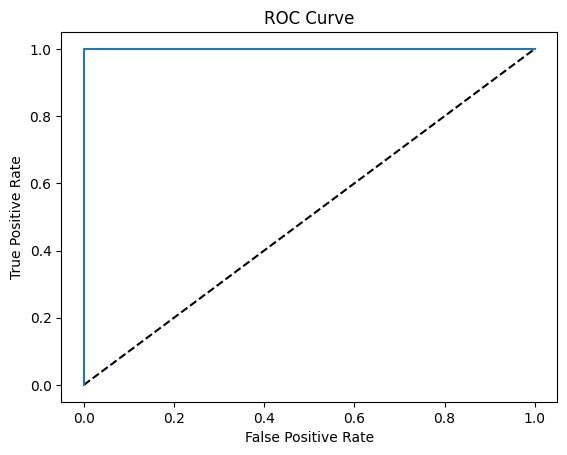

In [ ]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()